## Earnings Analysis: Explore the correlation between channel performance and estimated earnings.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
from sklearn.linear_model import LinearRegression

In [2]:
raw_data = pd.read_csv("Global YouTube Statistics.csv")

In [3]:
raw_data

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [4]:
raw_data.describe(include='all')

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,995,9.950000e+02,9.950000e+02,949,995,995.000000,873,873,965,...,6.580000e+02,990.000000,990,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
unique,NaN,995,NaN,NaN,18,992,NaN,49,49,14,...,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,T-Series,NaN,NaN,Entertainment,Preston,NaN,United States,US,Entertainment,...,NaN,NaN,Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,241,2,NaN,313,313,304,...,NaN,NaN,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,498.00000,NaN,2.298241e+07,1.103954e+10,NaN,NaN,9187.125628,NaN,NaN,NaN,...,3.490791e+05,2012.630303,NaN,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,NaN,1.752611e+07,1.411084e+10,NaN,NaN,34151.352254,NaN,NaN,NaN,...,6.143554e+05,4.512503,NaN,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,NaN,1.230000e+07,0.000000e+00,NaN,NaN,0.000000,NaN,NaN,NaN,...,1.000000e+00,1970.000000,NaN,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,NaN,1.450000e+07,4.288145e+09,NaN,NaN,194.500000,NaN,NaN,NaN,...,1.000000e+05,2009.000000,NaN,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,NaN,1.770000e+07,7.760820e+09,NaN,NaN,729.000000,NaN,NaN,NaN,...,2.000000e+05,2013.000000,NaN,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,NaN,2.460000e+07,1.355470e+10,NaN,NaN,2667.500000,NaN,NaN,NaN,...,4.000000e+05,2016.000000,NaN,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880


In [32]:
raw_data.corr()

C:\Users\42128\AppData\Local\Temp\ipykernel_25020\2464266106.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_data.corr()


,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
rank,1.000000,-0.640608,-0.453363,-0.051036,-0.059455,0.016776,-0.029554,-0.186339,-0.248394,-0.248050,...,-0.248392,-0.188571,0.106025,-0.006256,-0.037491,-0.025475,-0.014860,-0.038807,0.000036,0.019003
subscribers,-0.640608,1.000000,0.750958,0.077136,0.057202,0.032683,0.027393,0.278846,0.388941,0.388579,...,0.388935,0.309527,-0.141827,-0.011836,-0.006804,0.082219,-0.008251,0.083521,0.019450,0.022443
video views,-0.453363,0.750958,1.000000,0.165928,-0.061807,-0.068277,-0.050194,0.361856,0.552096,0.551455,...,0.552091,0.187384,-0.127068,-0.038180,-0.015232,0.080214,-0.000729,0.076649,0.037334,0.031268
uploads,-0.051036,0.077136,0.165928,1.000000,-0.108988,-0.078394,-0.098450,0.101521,0.166922,0.167283,...,0.166904,0.008933,-0.154904,0.034900,-0.218396,0.143122,-0.188101,0.072807,-0.067868,0.233169
video_views_rank,-0.059455,0.057202,-0.061807,-0.108988,1.000000,0.877504,0.949936,-0.067193,-0.208863,-0.208935,...,-0.208851,-0.167295,0.006671,0.031231,0.046934,-0.103178,-0.029276,-0.122747,0.015932,-0.016492
country_rank,0.016776,0.032683,-0.068277,-0.078394,0.877504,1.000000,0.898442,-0.098737,-0.148947,-0.148960,...,-0.148946,-0.126175,-0.037807,-0.012699,0.103290,-0.053181,0.066697,-0.024578,0.048323,-0.072476
channel_type_rank,-0.029554,0.027393,-0.050194,-0.098450,0.949936,0.898442,1.000000,-0.129051,-0.187908,-0.187970,...,-0.187896,-0.154021,-0.014002,0.038299,0.062484,-0.116254,0.003697,-0.123852,0.010195,-0.055144
video_views_for_the_last_30_days,-0.186339,0.278846,0.361856,0.101521,-0.067193,-0.098737,-0.129051,1.000000,0.680330,0.680289,...,0.680330,0.451523,0.053123,-0.013670,-0.035610,0.053859,-0.002323,0.051126,-0.026864,0.049033
lowest_monthly_earnings,-0.248394,0.388941,0.552096,0.166922,-0.208863,-0.148947,-0.187908,0.680330,1.000000,0.999955,...,0.999998,0.679360,0.072316,-0.040269,-0.062190,0.104812,-0.042874,0.081206,0.006583,0.100379
highest_monthly_earnings,-0.248050,0.388579,0.551455,0.167283,-0.208935,-0.148960,-0.187970,0.680289,0.999955,1.000000,...,0.999953,0.679699,0.072289,-0.039959,-0.061973,0.104785,-0.042627,0.081226,0.006873,0.100299


### The chanel performance consists of subscribers, video views, and uploads. I am going to use these three variables to find the correlation between each type of earning

## Preprocessing

### Selecting variables

In [5]:
data = pd.DataFrame()
save_data_names=['Youtuber', 'subscribers', 'video views','uploads', 'lowest_monthly_earnings',
                'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings']
for i in range(len(save_data_names)):
    data[save_data_names[i]] = raw_data[save_data_names[i]]

data

,Youtuber,subscribers,video views,uploads,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings
0,T-Series,245000000,2.280000e+11,20082,564600.0,9000000.00,6800000.00,1.084000e+08
1,YouTube Movies,170000000,0.000000e+00,1,0.0,0.05,0.04,5.800000e-01
2,MrBeast,166000000,2.836884e+10,741,337000.0,5400000.00,4000000.00,6.470000e+07
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,966,493800.0,7900000.00,5900000.00,9.480000e+07
4,SET India,159000000,1.480000e+11,116536,455900.0,7300000.00,5500000.00,8.750000e+07
...,...,...,...,...,...,...,...,...
990,Natan por Aï¿,12300000,9.029610e+09,1200,138100.0,2200000.00,1700000.00,2.650000e+07
991,Free Fire India Official,12300000,1.674410e+09,1500,16200.0,258900.00,194200.00,3.100000e+06
992,Panda,12300000,2.214684e+09,2452,17.0,268.00,201.00,3.200000e+03
993,RobTopGames,12300000,3.741235e+08,39,968.0,15500.00,11600.00,1.858000e+05


In [31]:
data.corr()

C:\Users\42128\AppData\Local\Temp\ipykernel_25020\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,subscribers,video views,uploads,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings
subscribers,1.000000,0.750958,0.077136,0.388941,0.388579,0.389072,0.388935
video views,0.750958,1.000000,0.165928,0.552096,0.551455,0.552776,0.552091
uploads,0.077136,0.165928,1.000000,0.166922,0.167283,0.167745,0.166904
lowest_monthly_earnings,0.388941,0.552096,0.166922,1.000000,0.999955,0.999942,0.999998
highest_monthly_earnings,0.388579,0.551455,0.167283,0.999955,1.000000,0.999884,0.999953
lowest_yearly_earnings,0.389072,0.552776,0.167745,0.999942,0.999884,1.000000,0.999941
highest_yearly_earnings,0.388935,0.552091,0.166904,0.999998,0.999953,0.999941,1.000000


### Dealing with missing values

In [6]:
data.isnull().sum()

Youtuber                    0
subscribers                 0
video views                 0
uploads                     0
lowest_monthly_earnings     0
highest_monthly_earnings    0
lowest_yearly_earnings      0
highest_yearly_earnings     0
dtype: int64

In [7]:
data = data.dropna(axis=0)

In [8]:
data.isnull().sum()

Youtuber                    0
subscribers                 0
video views                 0
uploads                     0
lowest_monthly_earnings     0
highest_monthly_earnings    0
lowest_yearly_earnings      0
highest_yearly_earnings     0
dtype: int64

### Dealing with outliers

### lowest_monthly_earnings

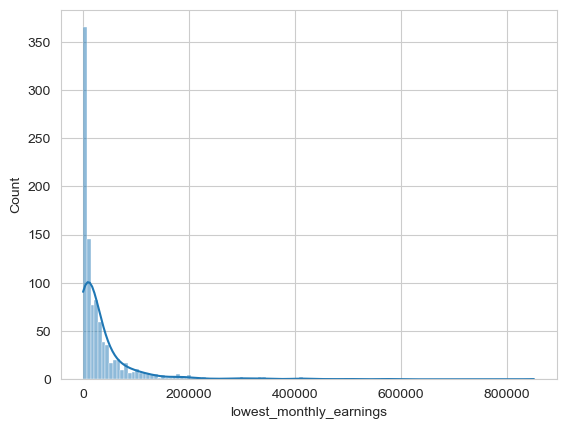

In [9]:
sns.histplot(data['lowest_monthly_earnings'], kde=True)
quantile_value = 0.99

<Axes: xlabel='lowest_monthly_earnings', ylabel='Count'>

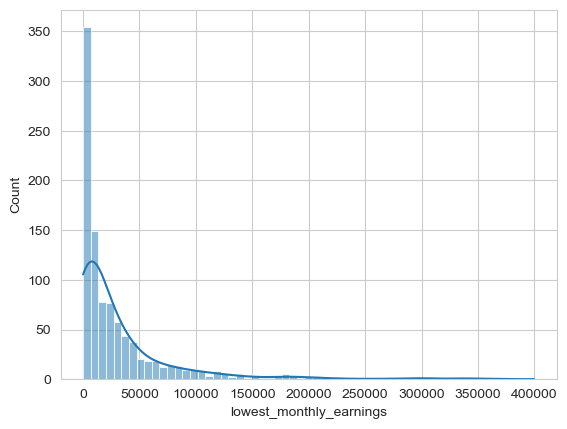

In [10]:
q = data['lowest_monthly_earnings'].quantile(quantile_value)
data_1 = data[data['lowest_monthly_earnings']<q]

sns.histplot(data_1['lowest_monthly_earnings'], kde=True)

### highest_monthly_earnings

<Axes: xlabel='highest_monthly_earnings', ylabel='Count'>

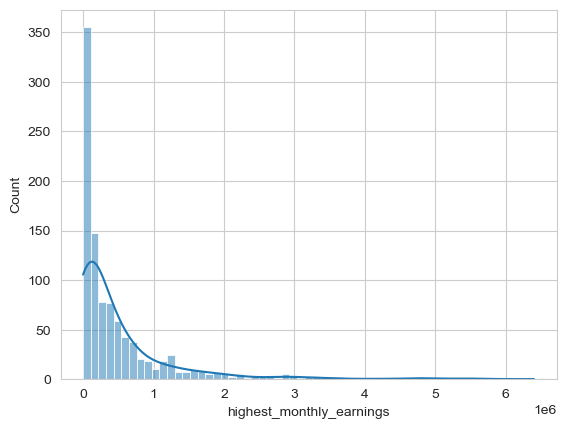

In [11]:
sns.histplot(data_1['highest_monthly_earnings'], kde=True)

<Axes: xlabel='highest_monthly_earnings', ylabel='Count'>

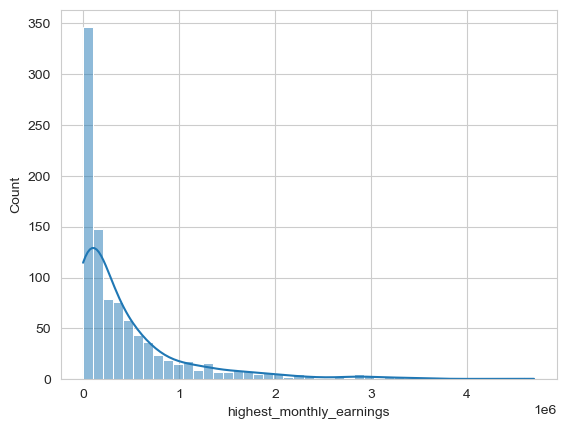

In [12]:
q = data_1['highest_monthly_earnings'].quantile(quantile_value)
data_2 = data_1[data_1['highest_monthly_earnings']<q]

sns.histplot(data_2['highest_monthly_earnings'], kde=True)

### lowest_yearly_earnings

<Axes: xlabel='lowest_yearly_earnings', ylabel='Count'>

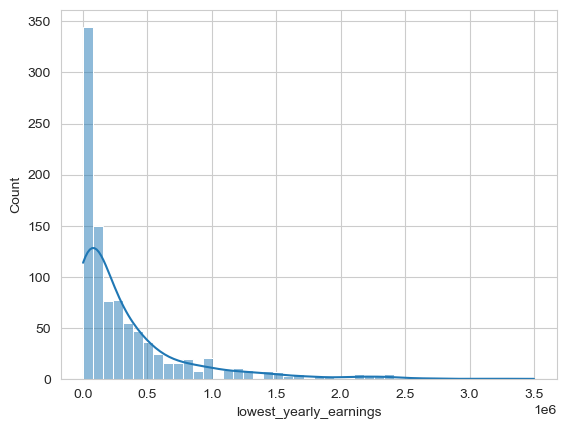

In [13]:
sns.histplot(data_2['lowest_yearly_earnings'], kde=True)

<Axes: xlabel='lowest_yearly_earnings', ylabel='Count'>

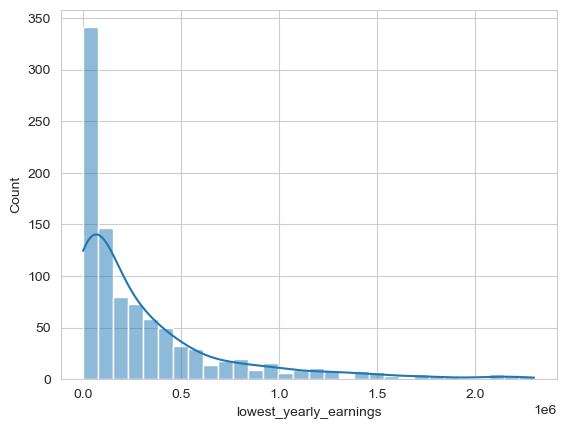

In [14]:
q = data_2['lowest_yearly_earnings'].quantile(quantile_value)
data_3 = data_2[data_2['lowest_yearly_earnings']<q]

sns.histplot(data_3['lowest_yearly_earnings'], kde=True)

### highest yearly earnings

<Axes: xlabel='highest_yearly_earnings', ylabel='Count'>

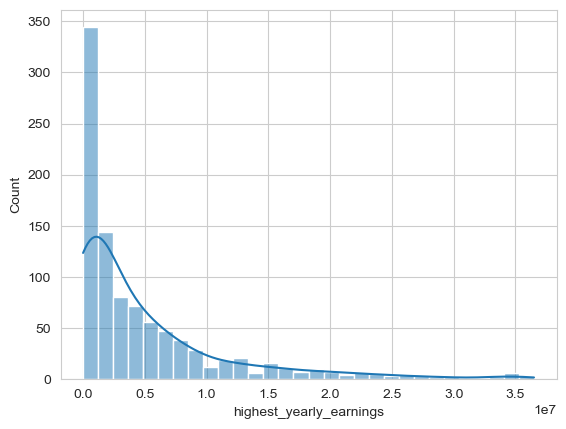

In [15]:
sns.histplot(data_3['highest_yearly_earnings'], kde=True)

<Axes: xlabel='highest_yearly_earnings', ylabel='Count'>

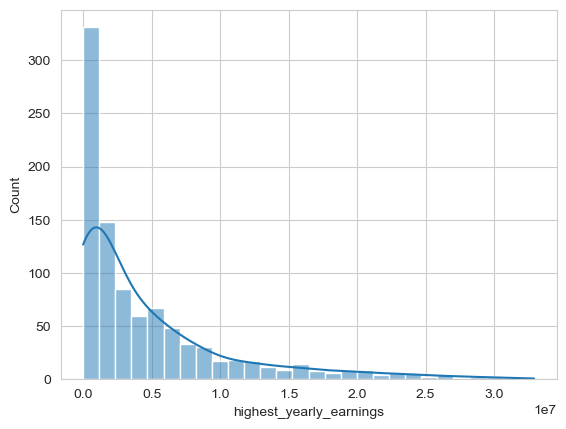

In [16]:
q = data_3['highest_yearly_earnings'].quantile(quantile_value)
data_4 = data_3[data_3['highest_yearly_earnings']<q]

sns.histplot(data_4['highest_yearly_earnings'], kde=True)

### subscribers

<Axes: xlabel='subscribers', ylabel='Count'>

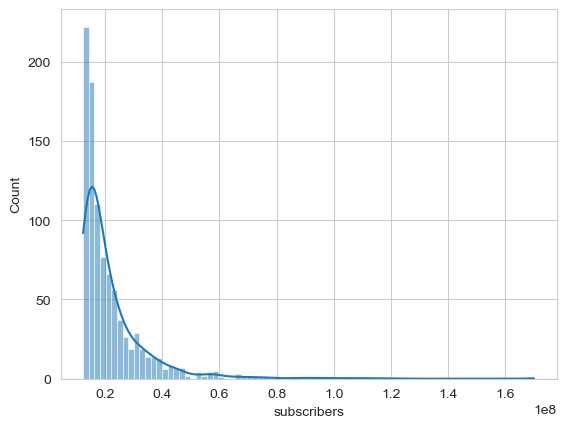

In [17]:
sns.histplot(data_4['subscribers'], kde=True)

<Axes: xlabel='subscribers', ylabel='Count'>

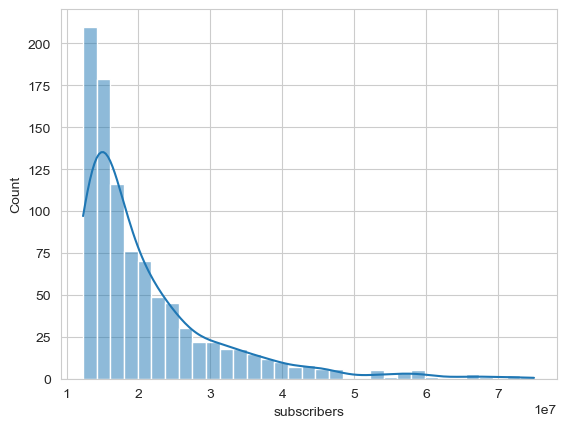

In [18]:
q = data_4['subscribers'].quantile(quantile_value)
data_5 = data_4[data_4['subscribers']<q]
sns.histplot(data_5['subscribers'], kde=True)

### Video views

<Axes: xlabel='video views', ylabel='Count'>

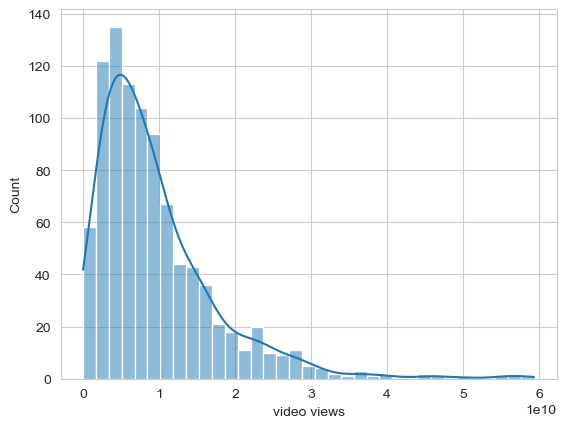

In [19]:
sns.histplot(data_5['video views'], kde=True)

<Axes: xlabel='video views', ylabel='Count'>

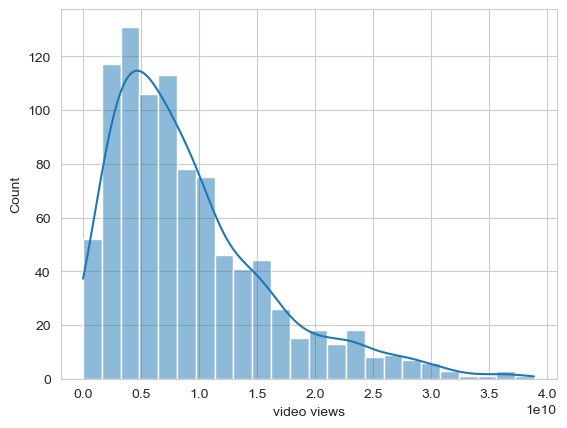

In [20]:
q = data_5['video views'].quantile(quantile_value)
data_6 = data_5[data_5['video views']<q]
sns.histplot(data_6['video views'], kde=True)

### Uploads

<Axes: xlabel='uploads', ylabel='Count'>

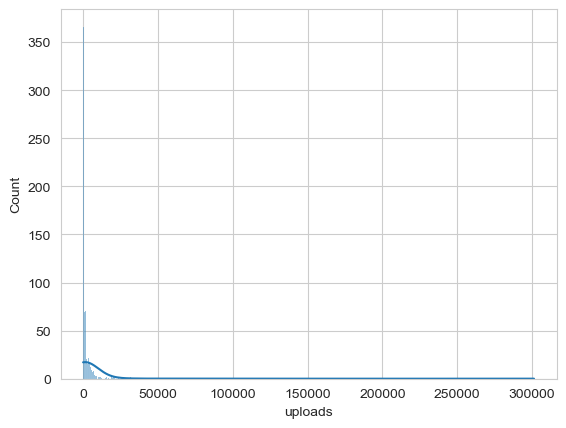

In [21]:
sns.histplot(data_6['uploads'], kde=True)

<Axes: xlabel='uploads', ylabel='Count'>

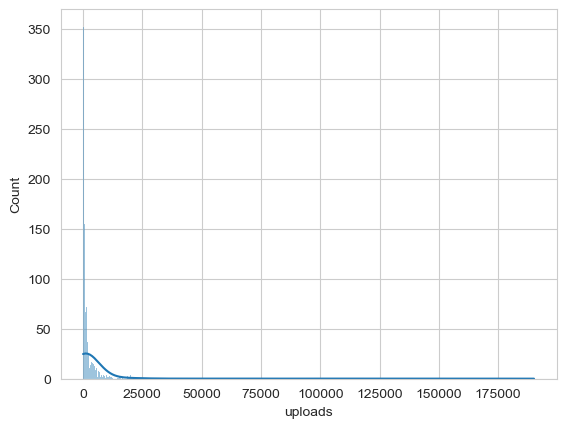

In [22]:
q = data_6['uploads'].quantile(quantile_value)
data_7 = data_6[data_6['uploads']<q]
sns.histplot(data_7['uploads'], kde=True)

In [23]:
data_cleaned = data_7.copy()

### Since it is not linear, so I cannot use the linear regression. I need to use the log transformation to fix this non-linear

[]

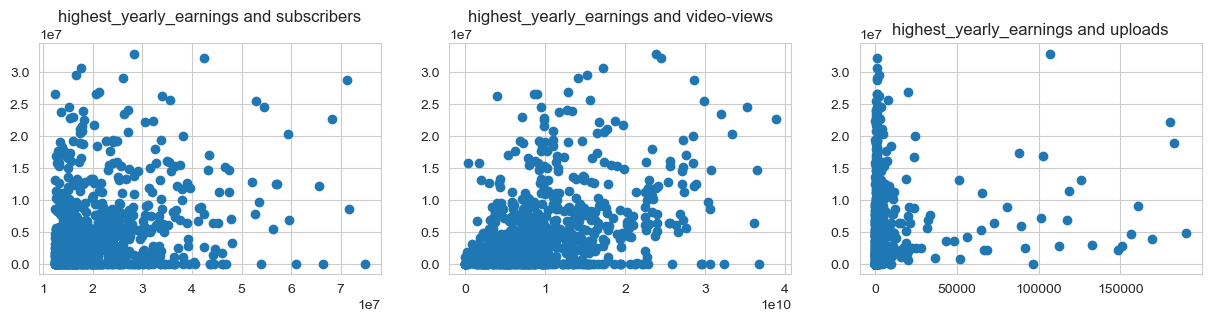

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(15,3))

ax1.scatter(data_cleaned['subscribers'], data_cleaned['highest_yearly_earnings'])
ax1.set_title('highest_yearly_earnings and subscribers')

ax2.scatter(data_cleaned['video views'], data_cleaned['highest_yearly_earnings'])
ax2.set_title('highest_yearly_earnings and video-views')

ax3.scatter(data_cleaned['uploads'], data_cleaned['highest_yearly_earnings'])
ax3.set_title('highest_yearly_earnings and uploads')
plt.plot()

## Checking OLS assumption (using the highest_yearly_earnings)

## Linearity

In [25]:
variables = []
index = 0
for i in range(len(data_cleaned['highest_yearly_earnings'])):
    if data_cleaned['highest_yearly_earnings'].values[i] <= 1: 
        variables.insert(index, 0)
    else:
        value = np.log(data_cleaned['highest_yearly_earnings'].values[i])
        variables.insert(index, value)
    index += 1

In [28]:
data_cleaned['log_highest_yearly_earnings'] = variables
data_cleaned.head()

,Youtuber,subscribers,video views,uploads,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,log_highest_yearly_earnings
18,Sports,75000000,0.000000e+00,3,0.0,0.06,0.05,0.77,0.000000
19,Justin Bieber,71600000,3.060812e+10,249,44100.0,705300.00,529000.00,8500000.00,15.955577
20,HYBE LABELS,71300000,2.863457e+10,1337,149500.0,2400000.00,1800000.00,28700000.00,17.172408
22,Pinkfong Baby Shark - Kids' Songs & Stories,68200000,3.884323e+10,2865,118300.0,1900000.00,1400000.00,22700000.00,16.937875
23,Canal KondZilla,66500000,3.677559e+10,2572,0.0,0.00,0.00,0.00,0.000000


[]

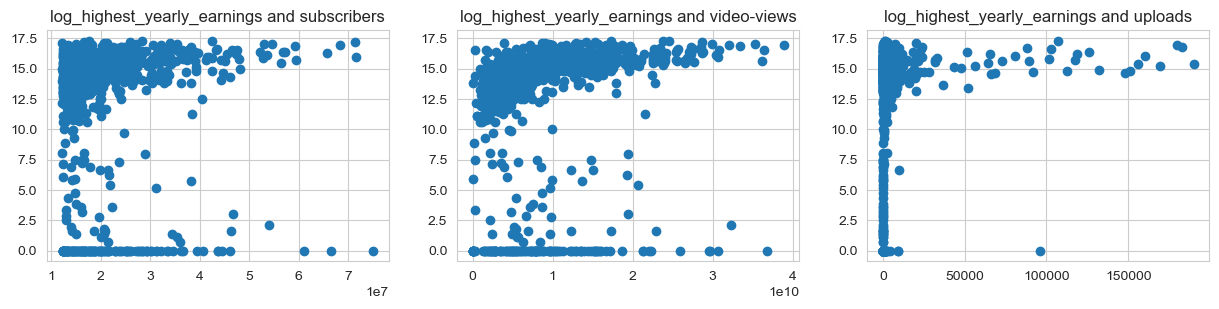

In [30]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(15,3))

ax1.scatter(data_cleaned['subscribers'], data_cleaned['log_highest_yearly_earnings'])
ax1.set_title('log_highest_yearly_earnings and subscribers')

ax2.scatter(data_cleaned['video views'], data_cleaned['log_highest_yearly_earnings'])
ax2.set_title('log_highest_yearly_earnings and video-views')

ax3.scatter(data_cleaned['uploads'], data_cleaned['log_highest_yearly_earnings'])
ax3.set_title('log_highest_yearly_earnings and uploads')
plt.plot()